# Books Recommendation system - Data wrangling and EDA
## Capstone Project Two : Springboard Data Science career track
### Notebook by Debisree Ray


### Acknowledgement:
* Mentor: Max Sop

* Springboard Team

* The data for this project originally comes from the GoodReads.com website. It was collected and made available by Zygmunt Zając on GitHub (https://github.com/zygmuntz/goodbooks-10k).


* Cover image: Internet

## 1. Introduction - The Problem:

Online recommendation systems are the ‘in’ thing to do for many e-commerce websites. A recommendation system broadly recommends products to customers best suited to their tastes and traits. This project is focused around building various kinds of book recommendation engines; namely the Simple Generic Recommender, the Content-Based Filter and the User-Based Collaborative Filter. The performance of the systems will be evaluated in both a qualitative and quantitative manner.

<img src="book.png" align="center" width="100%"/>

## 2. The Client:

Any E-commerce business website or online book-selling portal is the potential customer.

### 3. The Data:
The data is originally from the GoodReads.com website. It was collected and made available by Zygmunt Zając on GitHub (https://github.com/zygmuntz/goodbooks-10k).


* **'books.csv:'** 
   There are 10,000 books in this dataset. Descriptions of the columns are as follows: 

  * **books_count:** the number of editions for a given work.
  * **authors:** the authors(s) name.
  * **original_publication_year:** (9979 non-null)
  * **original_title:** (9415 non-null)
  * **title:** similar to original_title and includes the order it appears in a books series.
  * **language_code:** unclear if this is the language of the original edition or post popular edition. (8916 non-null, object)
  * **average_rating:** the mean rating out of 1-5 stars.
  * **ratings_count:** presumably, the number of unique users who have rated this book. It is lower than work_ratings_count.
  * **work_ratings_count:** number of total ratings a book received, may include multiple ratings per user?
  * **work_text_reviews_count:** number of written reviews, which is different than numerical ratings (number of stars).
  * **ratings_1:** number of 1-star ratings
  * **ratings_2:** number of 2-star ratings
  * **ratings_3:** number of 3-star ratings
  * **ratings_4:** number of 4-star ratings
  * **ratings_5:** number of 5-star ratings
  
* **'ratings.csv:'**
  On a scale of 1-5, how did the user rate a book? The list contains 5,976,479 book-user pairs and 53,424 unique users. The columns are as follows: 
  
  * **user_id:**
  * **book_id:**
  * **rating (1, 2, 3, 4, or 5):**

* **'to_read.csv:'** 
  Each entry represent a book that a user wants to read. There are 912,705 pair-wise entries. The columns are as follows: 
  
  * **user_id:**
  * **book_id:**

* **'tags.csv:'** 
  A list of user-created tags. These vary widely from genres to “16th-century” to “30-books-to-read-before-30”. There are 534,252 unique tag names. The columns are as follows: 
  
  * **tag_id:**
  * **tag_name:**

* **'book_tags.csv:'** 
   The number of times each tag was given to a specific book. The list contains 999,912 book-tag pairs. The columns are as follows: 
   * **goodreads_book_id:**
   * **tag_id:**
   * **count:**



In [2]:
import os
import math 
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats


#ignore warning messages to ensure clean outputs
import warnings
warnings.filterwarnings('ignore')

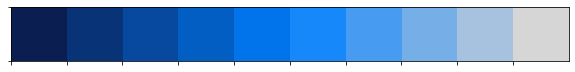

In [3]:
# Set chart defaults
fontsize = 14
figsize = (10,5)

# Define  colors
light_blue = '#007fff'
light_gray = '#d6d6d6'
dark_blue = '#133675'
dark_gray = '#696969'
darkest_blue = '#0b1e51'
darkest_gray = '#181818'

# Create Matplotlib colormap
def cmap(k, N=256):
    colors = (darkest_blue, light_blue, light_gray)
    return LinearSegmentedColormap.from_list('my_col', colors, N=max(N, 2))(k)

# Create Seaborn color palette
def palette(N):
    return np.asarray([cmap(k, N) for k in range(N)])

sns.palplot(sns.color_palette(palette(10)))

### 1. book_tags.csv:

* 'book_tags.csv' has three columns. 
* There are 999912 entries with no missing values.
* First two columns are categorical values showing Goodreads book ID and tag ID.
* 10000 unique Book IDs are there.
* The third column is a numeric one showing the no. of counts for each tag-IDs.
* Maximum no. of counts of any tag-ID is 50938 (Tag-ID = 4)
* Minimum no. of counts of any tag-ID is 1
* 34252 unique tag IDs are there.
* 49.9% of the tag-IDs are used more than once. So, referred tham as 'popular'
* 50.1% of the tag-IDs are used just once. So referred then as 'Non popular'.

In [4]:
book_tag = pd.read_csv('book_tags.csv')
book_tag.head()

,goodreads_book_id,tag_id,count
0,1,30574,167697
1,1,11305,37174
2,1,11557,34173
3,1,8717,12986
4,1,33114,12716


In [5]:
book_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999912 entries, 0 to 999911
Data columns (total 3 columns):
goodreads_book_id    999912 non-null int64
tag_id               999912 non-null int64
count                999912 non-null int64
dtypes: int64(3)
memory usage: 22.9 MB


In [6]:
#Goodreads book ID:

id=book_tag['goodreads_book_id'].value_counts()
id.index
#len(id.unique())

Int64Index([   10235,  6952423,    14497,    12448,  5941233,   776159,
              645023,    32426,   106134,  1605034,
            ...
             1044141, 17325147, 13051316, 15818107,    11605,    38210,
              216377,   280958, 18607805, 22931009],
           dtype='int64', length=10000)

In [7]:
#(Tag ID) counts:

tag_count=book_tag['count'].value_counts()
tag_count.max()
#tag_count.unique

50938

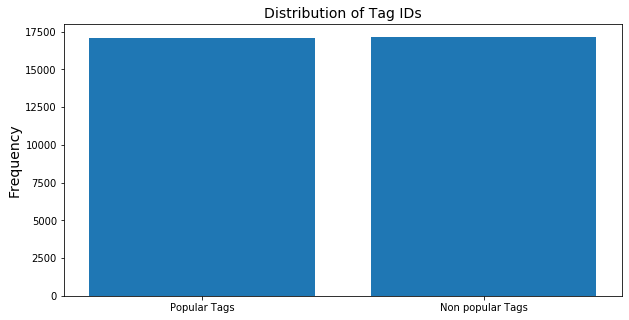

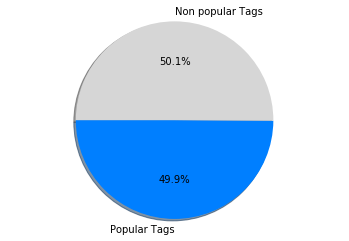

In [8]:
#Tag ID:

tag=book_tag['tag_id'].value_counts()

#See, how many Tag IDs are popular:

not_pop_tag= np.count_nonzero(tag.values == 1)
is_pop_tag = np.count_nonzero(tag.values >1)

#pie plot showing the returning vs. non returning:


plt.figure(figsize=figsize)
x=['Popular Tags','Non popular Tags']
y=[is_pop_tag, not_pop_tag]
_=plt.bar(x,y)
plt.xlabel('',fontsize=fontsize)
plt.ylabel('Frequency',fontsize=fontsize)
plt.title('Distribution of Tag IDs',fontsize=fontsize)
plt.savefig("1.png")
plt.show()


labels = 'Popular Tags','Non popular Tags'
sizes = [is_pop_tag, not_pop_tag]
colors = (light_blue, light_gray)
explode = (0.00, 0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("1a.png")
plt.show()


### 2. 'tags.csv':

* 34252 unique tag IDs are out there,
* 34252 tag names are there.

In [9]:
tag = pd.read_csv('tags.csv')
tag.head()

,tag_id,tag_name
0,0,-
1,1,--1-
2,2,--10-
3,3,--12-
4,4,--122-


In [10]:
tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34252 entries, 0 to 34251
Data columns (total 2 columns):
tag_id      34252 non-null int64
tag_name    34252 non-null object
dtypes: int64(1), object(1)
memory usage: 535.3+ KB


In [11]:
tag_id=tag['tag_id'].value_counts()
tag_id.index

Int64Index([ 2047, 27975,  1322,  3371, 13612, 15661,  9518, 11567, 34106,
            21824,
            ...
            15026, 12979,  2740,   693,  6838,  4791, 27320, 25273, 31418,
                0],
           dtype='int64', length=34252)

In [85]:
#name=tag['tag_name'].value_counts()
name=tag['tag_name'].value_counts()

name

amazon-s-100                       1
scriptures                         1
fic-historical                     1
immortals-series                   1
pop-culture                        1
business                           1
patterson-private-series           1
reality-bites                      1
book-46                            1
camping                            1
my-fantastique-fiction             1
nassim-nicholas-taleb              1
stalkers                           1
newbery-honors                     1
plays-and-poetry                   1
se-hinton                          1
own-nonfiction                     1
sword-of-truth-series              1
orphanages                         1
serial-reader                      1
author-f                           1
wilderness-wonders                 1
lost-and-found                     1
skimmreads                         1
science-and-philosophy             1
ya-books-that-are-actually-good    1
spiritual-poetry                   1
n

### 3. 'to_read.csv':

* 912705 entries with no null values.
* Both the columns are categorical variables: unique ID identifying the user and another unique ID identifying the book, which the user wants to read.
* 9986 book IDs are out there.
* Book-ID no. 47 is the most demanded book, enlisted 2772 times. Followed by the Book-ID no. 143 (1967 times).
* 48871 unique user-IDs are there.
* User-ID '38457' is the popular one, enlisted 117 times. Followed by the user-ID '28259' (114 times).


In [12]:
read= pd.read_csv('to_read.csv')
read.head()

,user_id,book_id
0,9,8
1,15,398
2,15,275
3,37,7173
4,34,380


In [13]:
read.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 912705 entries, 0 to 912704
Data columns (total 2 columns):
user_id    912705 non-null int64
book_id    912705 non-null int64
dtypes: int64(2)
memory usage: 13.9 MB


In [96]:
read_user_id=read['user_id'].value_counts()
#read_user_id



In [95]:
read_book=read['book_id'].value_counts()
print(read_book.max())
print(read_book.min())



2772
1


### 4. ratings.csv:

* There are three columns: first two columns are categorical, user-ID and book-ID. The third column is a numeric one, showing the rating.
* 5976479 entries are there.
* 53424 unique different user-IDs are there.
* 10000 unique book- IDs are there.
* Book-ID no '1' is there 22806 times.
* The most popular (35.8%) rating is '4'. 
* Next most popular (33.2%) rating is '5'.
* Least popular (2.1%) rating is '1'.

In [15]:
rate = pd.read_csv('ratings.csv')
rate.head()

,user_id,book_id,rating
0,1,258,5
1,2,4081,4
2,2,260,5
3,2,9296,5
4,2,2318,3


In [16]:
rate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5976479 entries, 0 to 5976478
Data columns (total 3 columns):
user_id    int64
book_id    int64
rating     int64
dtypes: int64(3)
memory usage: 136.8 MB


In [17]:
user=rate['user_id'].value_counts()
book_id= rate['book_id'].value_counts()
rating= rate['rating'].value_counts(normalize=True)

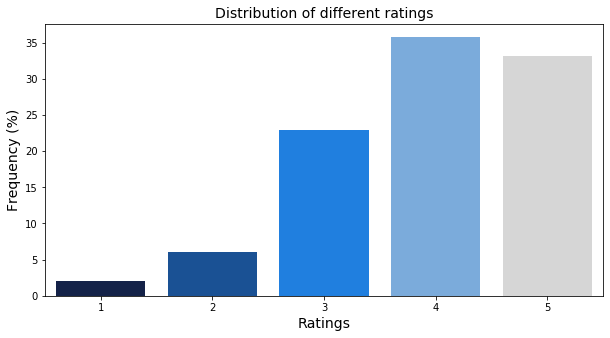

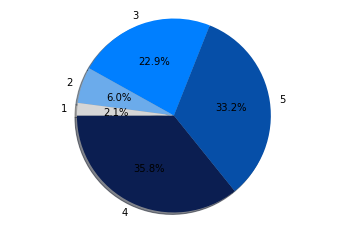

In [97]:
#Rating:

n = len(rating)
plt.figure(figsize=figsize)
sns.set_palette(palette(n))
_= sns.barplot(rating.index,rating.values*100)
plt.xlabel('Ratings',fontsize=fontsize)
plt.ylabel('Frequency (%)',fontsize=fontsize)
plt.title('Distribution of different ratings',fontsize=fontsize)
plt.savefig("3a.png")
plt.show()

#Pieplot:
labels = rating.index
sizes = rating.values
#colors = ['r', 'purple','g','coral','b']
explode = (0.00, 0,0,0,0)  # explode 1st slice

#Plot
plt.pie(sizes, explode=explode, labels=labels,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("3.png")
plt.show()

### 4.1 Statistics of user ratings:

* 20% of users have an average rating which is less than 3.5 stars. This could suggest that the readers like reading and have a positive bias towards books in general. 

* 80% of the users vary their ratings by 1 stars. For example, a user might always give books 4-star or 5-star ratings. Another might only give out 2-star or 3-star ratings.

             mean  count       var
user_id                           
1        3.589744    117  0.916446
2        4.415385     65  0.715385
3        1.736264     91  0.796337
4        3.768657    134  0.991191
5        4.040000    100  0.543838


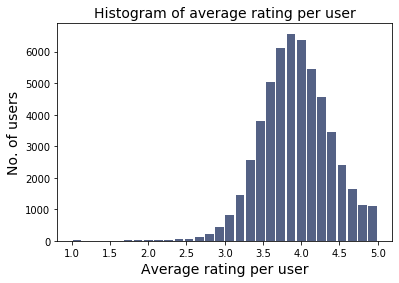

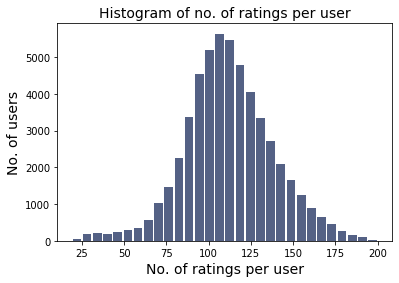

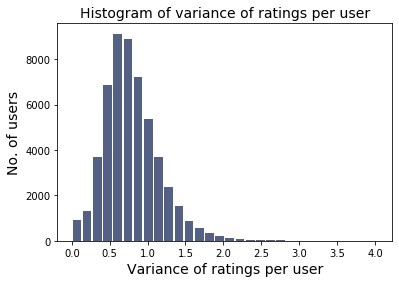

In [201]:
stat = rate.groupby('user_id')['rating'].agg(['mean', 'count','var'])
print(stat.head())

#plot:
#Histogram showing the average rating per user:

stat['mean'].plot(kind='hist', bins=30,alpha=0.7, rwidth=0.85)
plt.xlabel('Average rating per user',fontsize=fontsize)
plt.ylabel('No. of users',fontsize=fontsize)
plt.title('Histogram of average rating per user', fontsize=fontsize)
plt.savefig('a.png')
plt.show()


stat['count'].plot(kind='hist', bins=30,alpha=0.7, rwidth=0.85)
plt.xlabel('No. of ratings per user',fontsize=fontsize)
plt.ylabel('No. of users',fontsize=fontsize)
plt.title('Histogram of no. of ratings per user', fontsize=fontsize)
plt.savefig('b.png')
plt.show()


stat['var'].plot(kind='hist', bins=30,alpha=0.7, rwidth=0.85)
plt.xlabel('Variance of ratings per user',fontsize=fontsize)
plt.ylabel('No. of users',fontsize=fontsize)
plt.title('Histogram of variance of ratings per user', fontsize=fontsize)
plt.savefig('c.png')
plt.show()


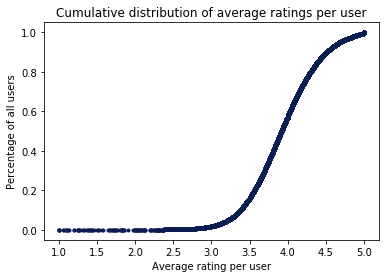

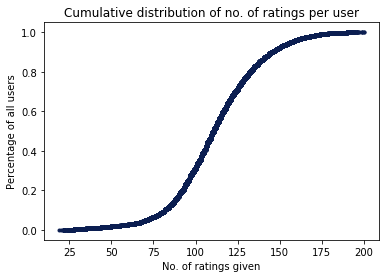

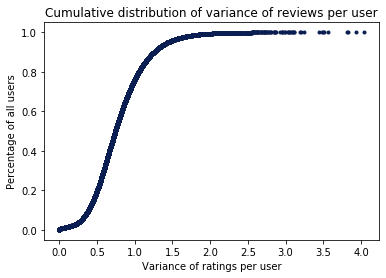

In [199]:
# ECDF:
def ecdf(array):
    """Compute ECDF for 1D array of measurement data."""
    # sort array to use as the x axis
    x = np.sort(array)    
    # use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    return x,y

# Distribution of average user ratings

x,y = ecdf(stat['mean'])
plt.plot(x, y, marker = '.', linestyle='none')
plt.xlabel('Average rating per user')
plt.ylabel('Percentage of all users')
plt.title('Cumulative distribution of average ratings per user')
plt.savefig('d.png')
plt.show()

# Distribution of number of user ratings

x,y = ecdf(stat['count'])
plt.plot(x, y, marker = '.', linestyle='none')
plt.xlabel('No. of ratings given')
plt.ylabel('Percentage of all users')
plt.title('Cumulative distribution of no. of ratings per user')
plt.savefig('e.png')
plt.show()

# Distribution of standard deviation of user ratings

x,y = ecdf(stat['var'])
plt.plot(x, y, marker = '.', linestyle='none')
plt.xlabel('Variance of ratings per user')
plt.ylabel('Percentage of all users')
plt.title('Cumulative distribution of variance of reviews per user')
plt.savefig('f.png')
plt.show()

### 4.2 Statistics on book-IDs:

In [208]:
stat_book = rate.groupby('book_id')['rating'].agg(['mean', 'count','var','std'])
print(stat_book.head())

#The book with maximum variance in rataing:
stat_book['var'].sort_values(ascending=False).head()

             mean  count       var       std
book_id                                     
1        4.279707  22806  0.754604  0.868680
2        4.351350  21850  0.748121  0.864940
3        3.214341  16931  1.908987  1.381661
4        4.329369  19088  0.740517  0.860533
5        3.772224  16604  1.090198  1.044125


book_id
4154    2.378466
1338    2.336421
4962    2.207716
3075    2.164206
9486    2.041667
Name: var, dtype: float64

### 5. 'books.csv':

* 10000 rows and 23 columns (features) are there.
* Last two columns are of no use in context to the analysis. So dropped them.
* The column 'best_book_id' is same as the column 'goodreads_book_id'. So we can drop this column.
* The descriptions of the columns are as follows:

   * **book_id:** Unique ID for the books.📚 
   * **goodreads_book_id:** Unique ID specific to Goodreads for books.
   * **work_id:** ?
   * **books_count:** the number of editions for a given work.
   * **isbn:** Unique ID identifying the book.
   * **isbn13:** ?
   * **authors:** name of the authors.
   * **original_publication_year:** publication year
   * **original_title:** title of the book
   * **title:** similar to original_title 
   * **language_code:** the language. 
   * **average_rating:** the mean rating out of 1-5 stars.
   * **ratings_count:** The number of unique users who have rated this book. It is lower than work_ratings_count.
   * **work_ratings_count:** number of total ratings a book received.
   * **work_text_reviews_count:** number of written reviews a book receiverd.
   * **ratings_1:** number of 1-star ratings.
   * **ratings_2:** number of 2-star ratings.
   * **ratings_3:** number of 3-star ratings.
   * **ratings_4:** number of 4-star ratings.
   * **ratings_5:** number of 5-star ratings.

In [99]:
book = pd.read_csv('books.csv')
book.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,4780653,4942365,155254,66715,127936,560092,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...
1,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,4602479,4800065,75867,75504,101676,455024,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...
2,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,3866839,3916824,95009,456191,436802,793319,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...
3,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,3198671,3340896,72586,60427,117415,446835,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...
4,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,2683664,2773745,51992,86236,197621,606158,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...


In [100]:
book.columns

Index(['book_id', 'goodreads_book_id', 'best_book_id', 'work_id',
       'books_count', 'isbn', 'isbn13', 'authors', 'original_publication_year',
       'original_title', 'title', 'language_code', 'average_rating',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5',
       'image_url', 'small_image_url'],
      dtype='object')

In [21]:
book.shape

(10000, 23)

In [22]:
book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 23 columns):
book_id                      10000 non-null int64
goodreads_book_id            10000 non-null int64
best_book_id                 10000 non-null int64
work_id                      10000 non-null int64
books_count                  10000 non-null int64
isbn                         9300 non-null object
isbn13                       9415 non-null float64
authors                      10000 non-null object
original_publication_year    9979 non-null float64
original_title               9415 non-null object
title                        10000 non-null object
language_code                8916 non-null object
average_rating               10000 non-null float64
ratings_count                10000 non-null int64
work_ratings_count           10000 non-null int64
work_text_reviews_count      10000 non-null int64
ratings_1                    10000 non-null int64
ratings_2                    10000 n

In [101]:
#Dropping the useless columns:

book=book.drop(['best_book_id','work_id','isbn13', 'image_url', 'small_image_url'], axis=1)
book.head()

,book_id,goodreads_book_id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
0,1,2767052,272,439023483,Suzanne Collins,2008.0,The Hunger Games,"The Hunger Games (The Hunger Games, #1)",eng,4.34,4780653,4942365,155254,66715,127936,560092,1481305,2706317
1,2,3,491,439554934,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,Harry Potter and the Sorcerer's Stone (Harry P...,eng,4.44,4602479,4800065,75867,75504,101676,455024,1156318,3011543
2,3,41865,226,316015849,Stephenie Meyer,2005.0,Twilight,"Twilight (Twilight, #1)",en-US,3.57,3866839,3916824,95009,456191,436802,793319,875073,1355439
3,4,2657,487,61120081,Harper Lee,1960.0,To Kill a Mockingbird,To Kill a Mockingbird,eng,4.25,3198671,3340896,72586,60427,117415,446835,1001952,1714267
4,5,4671,1356,743273567,F. Scott Fitzgerald,1925.0,The Great Gatsby,The Great Gatsby,eng,3.89,2683664,2773745,51992,86236,197621,606158,936012,947718


### 5.1 books_count:

* The book **'The Mirror Crack'd from Side to Side'** by Agatha Christie has the maximum no of editions, 186.
* 51.1% of the total books have only one edition
* 48.9% of the total books have more than one edition.

In [24]:
count= book['books_count'].value_counts()

book[book['books_count'] == 186]

,book_id,goodreads_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
6511,6512,16372,2107920,186,7120982,9.780007e+12,Agatha Christie,1962.0,The Mirror Crack'd from Side to Side,The Mirror Crack'd from Side to Side (Miss Mar...,eng,3.89,20177,23061,808,109,884,6586,9368,6114


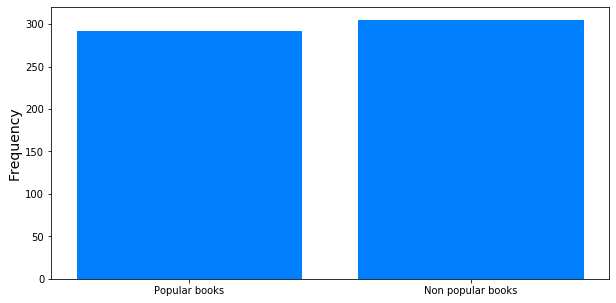

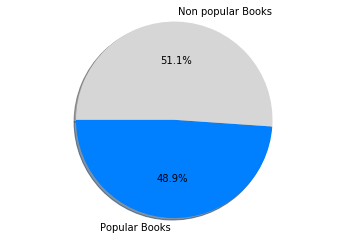

In [25]:
#See, how many books are popular (more than one editions):

not_pop= np.count_nonzero(count.values == 1)
is_pop = np.count_nonzero(count.values >1)

#plot:

plt.figure(figsize=figsize)
x=['Popular books','Non popular books']
y=[is_pop, not_pop]
_=plt.bar(x,y, color=light_blue)
plt.xlabel('',fontsize=fontsize)
plt.ylabel('Frequency',fontsize=fontsize)
plt.title('',fontsize=fontsize)
plt.savefig("4.png")
plt.show()

#pieplot:

labels = 'Popular Books','Non popular Books'
sizes = [is_pop, not_pop]
colors = (light_blue, light_gray)
explode = (0.00, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("4a.png")
plt.show()

### 5.2 Authors:

* **Stephen King** is the most popular author (60 different books are there), followed by **Nora Roberts** (59 times)
* Only 28.8% of the authors are popular (more than one books are reviewed).
* 71.2% of the authors are non popular (only one book)


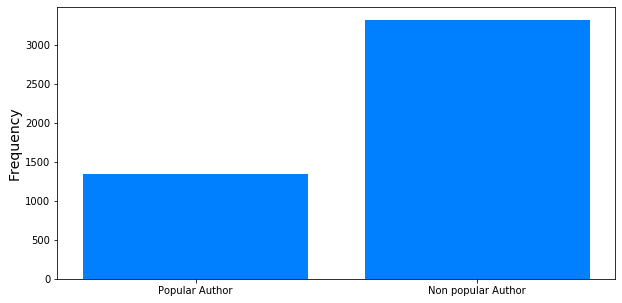

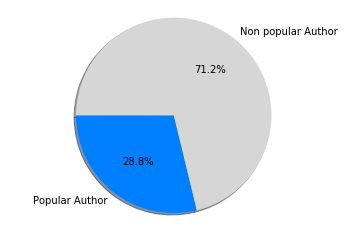

In [26]:
author = book['authors'].value_counts()

#See, how many books are popular (more than one books):

not_pop_auth= np.count_nonzero(author.values == 1)
is_pop_auth = np.count_nonzero(author.values >1)

#plot:

plt.figure(figsize=figsize)
x=['Popular Author','Non popular Author']
y=[is_pop_auth, not_pop_auth]
_=plt.bar(x,y, color=light_blue)
plt.xlabel('',fontsize=fontsize)
plt.ylabel('Frequency',fontsize=fontsize)
plt.title('',fontsize=fontsize)
plt.savefig("5.png")
plt.show()

#pieplot:

labels = 'Popular Author','Non popular Author'
sizes = [is_pop_auth, not_pop_auth]
colors = (light_blue, light_gray)
explode = (0.00, 0)  # explode 1st slice
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.savefig("5a.png")
plt.show()

#book[book['authors'] == 'Stephen King']

In [240]:
#The authors with highest average rating:
stat_auth = book.groupby('authors')['average_rating'].max()
stat_auth.sort_values(ascending=False).head()

authors
Bill Watterson                                4.82
Brandon Sanderson                             4.77
J.K. Rowling, Mary GrandPré                   4.77
Francine Rivers                               4.76
Anonymous, Lane T. Dennis, Wayne A. Grudem    4.76
Name: average_rating, dtype: float64

###  5.3 Publication year:

* There are 31 books with negative publication year! 
* 21 books have missing value (NaN) for the publication year.
* Year of publication does not have much correlation with the average rating.
* Year of publication and the no. of editions 

In [102]:
year = book['original_publication_year'].value_counts()
print(year.index.min())
print(year.index.max())

-1750.0
2017.0


In [28]:
book[['title', 'original_publication_year']] \
    [book.original_publication_year <= 0] \
    .sort_values(by='original_publication_year')

,title,original_publication_year
2075,The Epic of Gilgamesh,-1750.0
2141,The Iliad/The Odyssey,-762.0
340,The Iliad,-750.0
6165,The I Ching or Book of Changes,-750.0
78,The Odyssey,-720.0
1119,Aesop's Fables,-560.0
5636,The Dhammapada,-500.0
9678,The Upanishads: Translations from the Sanskrit,-500.0
402,The Art of War,-500.0
7777,The Analects,-476.0


In [180]:
book['original_publication_year'].isnull().sum()

21

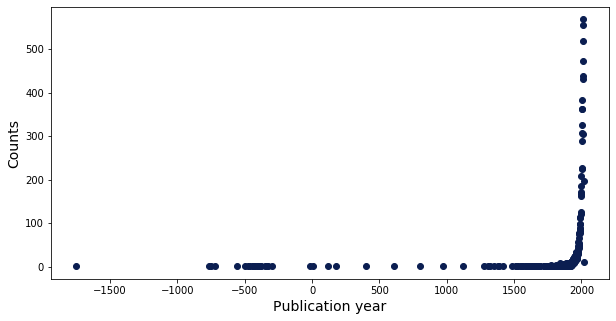

In [29]:
plt.figure(figsize=figsize)
_=plt.scatter(year.index,year.values)
plt.xlabel('Publication year',fontsize=fontsize)
plt.ylabel('Counts',fontsize=fontsize)
plt.savefig("6.png")
plt.show()


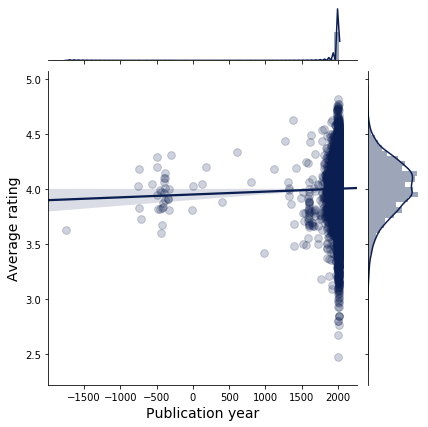

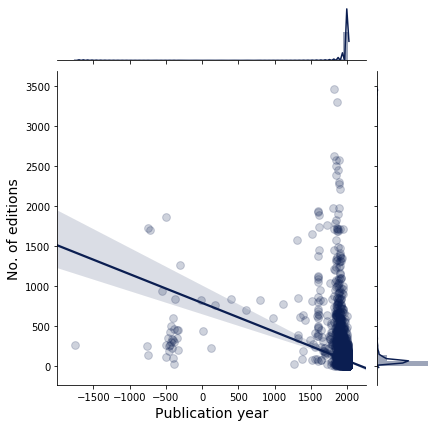

In [175]:
# Correlation between the publication year and no. of editions and the average rating:




#plt.figure(figsize=figsize)
_=sns.jointplot(x="original_publication_year", y="average_rating", data=book, kind='reg', scatter_kws={'alpha':0.2,'s':60})
#_.annotate(stats.pearsonr(x,y),fontsize=fontsize)
plt.xlabel('Publication year',fontsize=fontsize)
plt.ylabel('Average rating',fontsize=fontsize);
#plt.title('Correlation between the average ratings and the year of publication',fontsize=fontsize)
plt.savefig("16.png")
plt.show()

#
#plt.figure(figsize=figsize)
_=sns.jointplot(x="original_publication_year", y="books_count", data=book, kind='reg', scatter_kws={'alpha':0.2,'s':60})
#_=plt.annotate(stats.pearsonr(x,y),fontsize=fontsize)
plt.xlabel('Publication year',fontsize=fontsize)
plt.ylabel('No. of editions',fontsize=fontsize);
#plt.title('Correlation between the no. of editions and the year of publication',fontsize=fontsize)
plt.savefig("16a.png")
plt.show()

In [181]:
#from scipy.stats.stats import pearsonr

#print(pearsonr(book.original_publication_year, book.average_rating))
#print(pearsonr(book.original_publication_year, book.books_count))

### 5.4  original_title:

* This is the title of the books.
* 585 titles are missing! 
* Some titles are common (eg. There are 5 different books titled 'The Gift')

In [108]:
book['original_title'].value_counts()

The Gift                                                                                      5
                                                                                              5
Twilight                                                                                      4
Perfect                                                                                       4
Twisted                                                                                       3
Defiance                                                                                      3
The Awakening                                                                                 3
Gone                                                                                          3
Selected Poems                                                                                3
Hidden                                                                                        3
Heartless                               

In [31]:
book['original_title'].value_counts()
#book['title'].value_counts()
book[book['original_title']=='The Gift']

,book_id,goodreads_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
5341,5342,7646805,10194115,59,1846054761,9.781846e+12,"James Patterson, Ned Rust",2010.0,The Gift,"The Gift (Witch & Wizard, #2)",NaN,3.78,17070,23816,1413,661,2094,6195,7676,7190
6395,6396,393146,382708,39,763631620,9.780764e+12,Alison Croggon,2002.0,The Gift,"The Naming (The Books of Pellinor, #1)",en-US,4.00,19214,21162,1366,483,1207,4133,7432,7907
6505,6506,4279056,4326592,73,7284977,9.780007e+12,Cecelia Ahern,2008.0,The Gift,The Gift,en-GB,3.68,15310,18442,1337,509,1792,5482,5902,4757
7683,7684,59836,1912773,55,440221315,9.780440e+12,Danielle Steel,1986.0,The Gift,The Gift,en-US,3.91,12382,13114,473,218,819,3420,4186,4471
9365,9366,107781,2643640,51,671702505,9.780672e+12,Julie Garwood,1991.0,The Gift,"The Gift (Crown's Spies, #3)",eng,4.17,13977,15027,420,122,490,2783,4969,6663


### 5.5 Language code:

* 25 language codes are there.


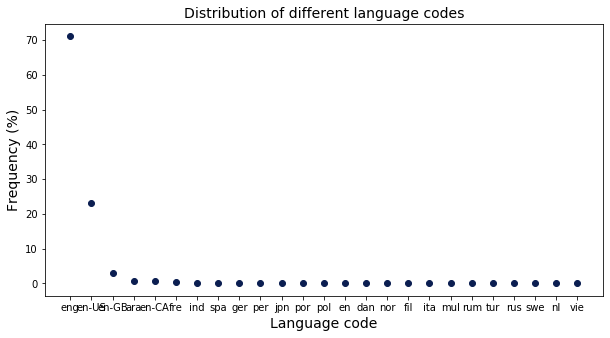

In [110]:
lan= book['language_code'].value_counts(normalize=True)

#Plot:
plt.figure(figsize=figsize)
_= plt.scatter(lan.index,lan.values*100)
plt.xlabel('Language code',fontsize=fontsize)
plt.ylabel('Frequency (%)',fontsize=fontsize)
plt.title('Distribution of different language codes', fontsize=fontsize)
plt.savefig("7.png")
plt.show()

### 5.6 Average Rating:

* This is the average rating obtained by each books.
* The mean of average_rating is 4.002
* Lowest of average book rating is 2.47
* Highest of average book rating is 4.82
* Standard deviation of average book rating is 0.25

In [33]:
avg= book['average_rating'].value_counts()
#avg

In [34]:
mean = book['average_rating'].mean()
print('The mean of average book rating (for each book) is:', mean)

The mean of average book rating (for each book) is: 4.002191000000001


In [35]:
book['average_rating'].describe()

count    10000.000000
mean         4.002191
std          0.254427
min          2.470000
25%          3.850000
50%          4.020000
75%          4.180000
max          4.820000
Name: average_rating, dtype: float64

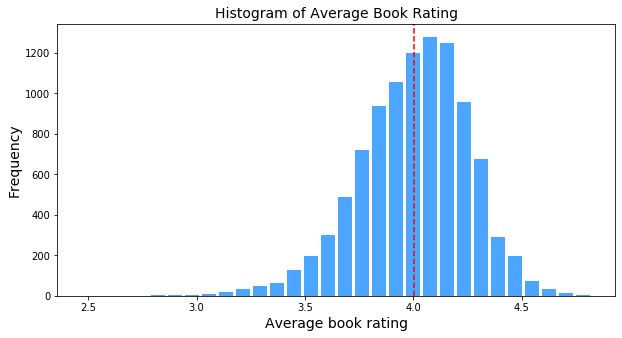

In [36]:
# Histogram showing the distribution of average book rating:

plt.figure(figsize=figsize)
#sns.set_palette(palette(n))
plt.hist(book.average_rating, bins=30, color=light_blue,alpha=0.7, rwidth=0.85)
plt.axvline(x=mean, c='r', linestyle='--')
plt.xlabel('Average book rating',fontsize=fontsize)
plt.ylabel('Frequency', fontsize=fontsize);
plt.title('Histogram of Average Book Rating', fontsize=fontsize)
plt.savefig("8.png")
plt.show()

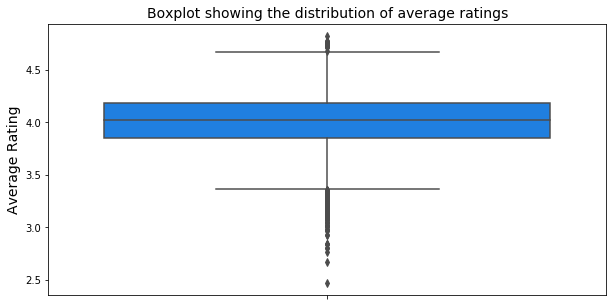

In [121]:
#Boxplot:

plt.figure(figsize=figsize)
sns.boxplot(book['average_rating'],orient='v',color=light_blue)
plt.ylabel ('Average Rating',fontsize=fontsize)
plt.title ('Boxplot showing the distribution of average ratings',fontsize=fontsize)
plt.savefig("8a.png")
plt.show()

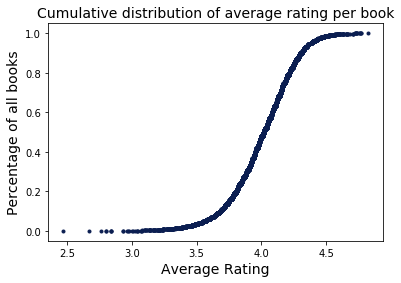

In [173]:
# ECDF of average rating
def ecdf(array):
    """Compute ECDF """
    
    x = np.sort(array)    
    # use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    return x,y

#Plot:
#plt.figure(figsize=figsize)
x,y = ecdf(book.average_rating)
plt.plot(x, y, marker = '.', linestyle='none')
#plt.xscale('log')
plt.xlabel('Average Rating',fontsize=fontsize)
plt.ylabel('Percentage of all books',fontsize=fontsize)
plt.title('Cumulative distribution of average rating per book',fontsize=fontsize)
plt.savefig("8b.png")
plt.show()

### 5.7 ratings_count:

* This is a numerical feature, showing the no. of **unique users**, who reviewed a book.
* The minimum no. of reviews received by any book = 2716
* The maximum no. of reviews received by any book = 4780653
* The mean is = 54001.25
* The standard deviation is = 157369.96

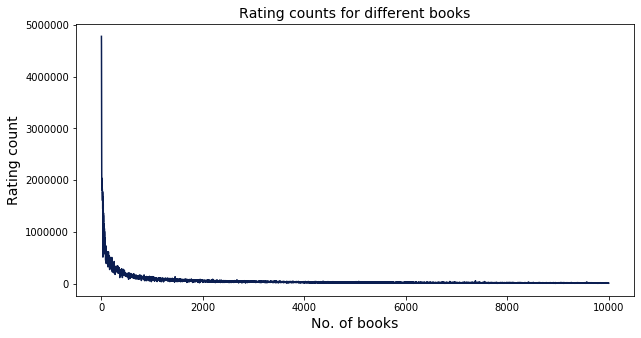

In [161]:
book['ratings_count'].mean()
book['ratings_count'].min()
book['ratings_count'].max()
book['ratings_count'].std()


#plot:
plt.figure(figsize=figsize)
_= plt.plot(book['ratings_count'])
plt.xlabel('No. of books', fontsize=fontsize)
plt.ylabel('Rating count', fontsize=fontsize)
plt.title ('Rating counts for different books',fontsize=fontsize)
plt.savefig("9.png")
plt.show()




### 5.8 work_ratings_count:

* Total no. of reviews that a book has received.
* May be, multiple reviews from any user is enlisted.
* The minimum no. of work_ratings_count by any book = 5510
* The maximum no. of work_ratings_count by any book = 4942365
* The mean is = 59687.32. So each book has been rated on an average 59687 times.
* The standard deviation is = 167803.79

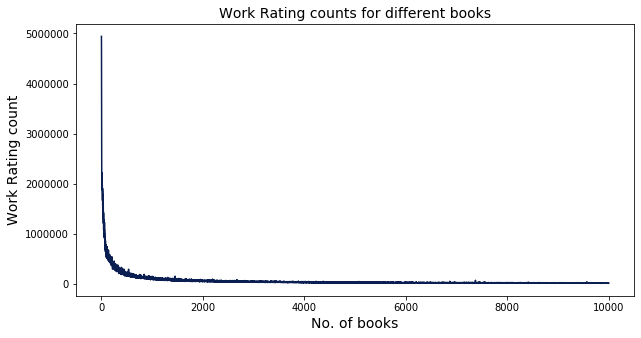

In [162]:
book['work_ratings_count'].mean()
book['work_ratings_count'].min()
book['work_ratings_count'].max()
book['work_ratings_count'].std()


#plot:
plt.figure(figsize=figsize)
_= plt.plot(book['work_ratings_count'])
plt.xlabel('No. of books', fontsize=fontsize)
plt.ylabel('Work Rating count', fontsize=fontsize)
plt.title ('Work Rating counts for different books',fontsize=fontsize)
plt.savefig("9a.png")
plt.show()

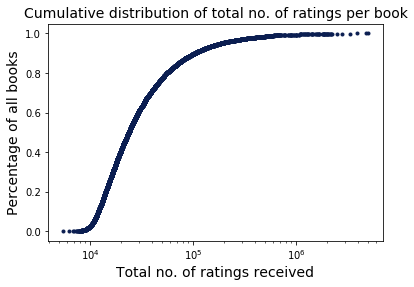

In [169]:
# ECDF of number of book ratings
def ecdf(array):
    """Compute ECDF """
    
    x = np.sort(array)    
    # use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    return x,y

#Plot:
#plt.figure(figsize=figsize)
x,y = ecdf(book.work_ratings_count)
plt.plot(x, y, marker = '.', linestyle='none')
plt.xscale('log')
plt.xlabel('Total no. of ratings received',fontsize=fontsize)
plt.ylabel('Percentage of all books',fontsize=fontsize)
plt.title('Cumulative distribution of total no. of ratings per book',fontsize=fontsize)
plt.savefig("9b.png")
plt.show()

### 5.9 work_text_reviews_count:

* This is a numerical feature showing the number of written reviews that a book has received.
* The minimum no. of text reviews received by any book = 3
* The maximum no. of text reviews received by any book = 155254
* The mean = 2919.9553
* The standard deviation = 6124.38



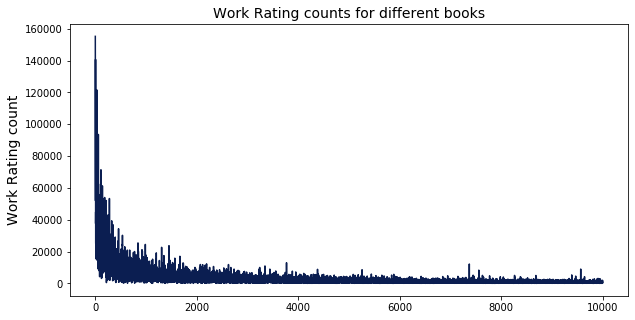

In [39]:
book['work_text_reviews_count'].min()
book['work_text_reviews_count'].max()
book['work_text_reviews_count'].mean()
book['work_text_reviews_count'].std()


#plot:
plt.figure(figsize=figsize)
_= plt.plot(book['work_text_reviews_count'])
plt.xlabel('')
plt.ylabel('Work Rating count', fontsize=fontsize)
plt.title ('Work Rating counts for different books',fontsize=fontsize)
plt.savefig("10.png")
plt.show()

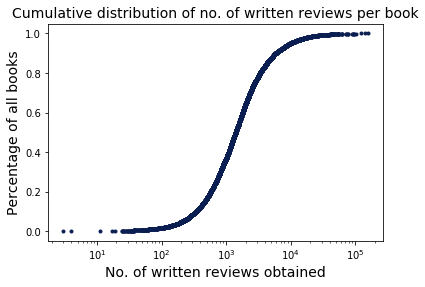

In [167]:
# ECDF of number of book ratings
def ecdf(array):
    """Compute ECDF """
    
    x = np.sort(array)    
    # use np.arange to create the y axis for cdf from 1/len to 1
    y = np.arange(1, len(array)+1)/len(array)
    return x,y

#Plot:
#plt.figure(figsize=figsize)
x,y = ecdf(book.work_text_reviews_count)
plt.plot(x, y, marker = '.', linestyle='none')
plt.xscale('log')
plt.xlabel('No. of written reviews obtained',fontsize=fontsize)
plt.ylabel('Percentage of all books',fontsize=fontsize)
plt.title('Cumulative distribution of no. of written reviews per book',fontsize=fontsize)
plt.savefig("10a.png")
plt.show()

### 5.10 ratings_1/2/3/4/5:


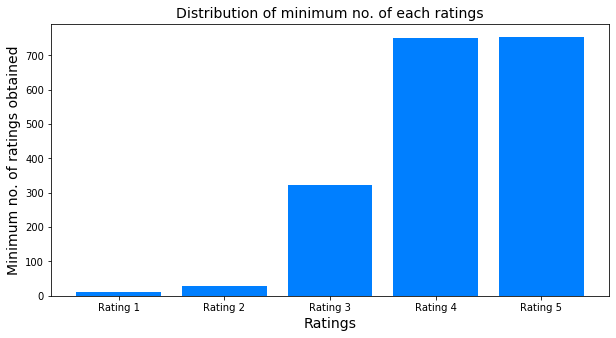

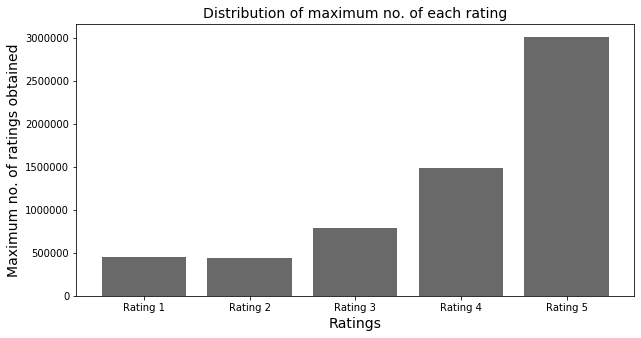

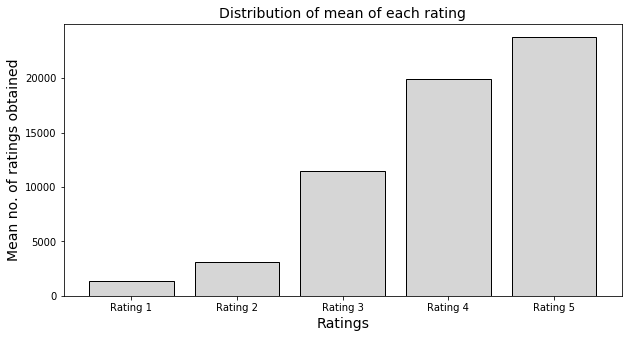

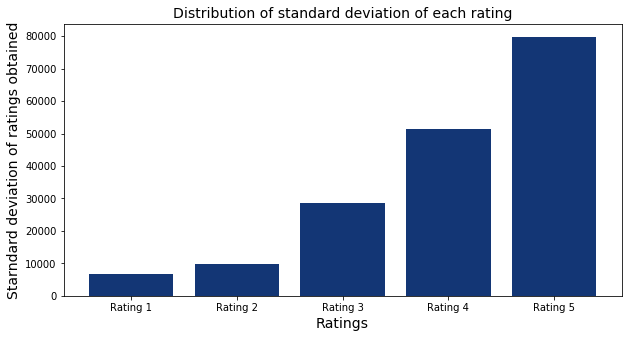

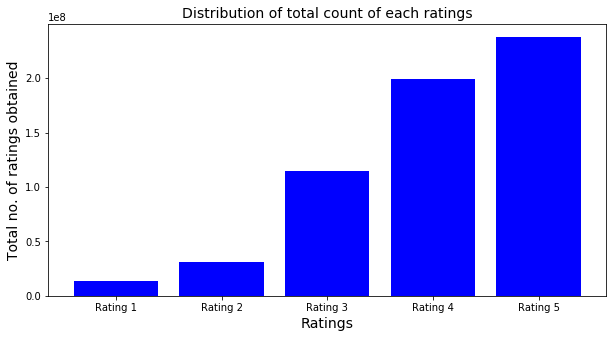

In [138]:
one=book['ratings_1'].sum()
one_min= book['ratings_1'].min()
one_max= book['ratings_1'].max()
one_std= book['ratings_1'].std()
one_mean= book['ratings_1'].mean()

two= book['ratings_2'].sum()
two_min= book['ratings_2'].min()
two_max= book['ratings_2'].max()
two_std= book['ratings_2'].std()
two_mean= book['ratings_2'].mean()

three=book['ratings_3'].sum()
three_min= book['ratings_3'].min()
three_max= book['ratings_3'].max()
three_std= book['ratings_3'].std()
three_mean= book['ratings_3'].mean()

four=book['ratings_4'].sum()
four_min= book['ratings_4'].min()
four_max= book['ratings_4'].max()
four_std= book['ratings_4'].std()
four_mean= book['ratings_4'].mean()

five=book['ratings_5'].sum()
five_min= book['ratings_5'].min()
five_max= book['ratings_5'].max()
five_std= book['ratings_5'].std()
five_mean= book['ratings_5'].mean()


#Distribution of ratings:

x= ['Rating 1','Rating 2','Rating 3','Rating 4','Rating 5']
y_sum=[one,two,three,four,five]
y_mean=[one_mean,two_mean,three_mean,four_mean,five_mean]
y_min=[one_min,two_min,three_min,four_min,five_min]
y_max=[one_max,two_max,three_max,four_max,five_max]
y_std=[one_std,two_std,three_std,four_std,five_std]

#plot:

plt.figure(figsize=figsize)
_= plt.bar(x,y_min,color=light_blue)
#_=plt.bar(x,y_max,width=0.2,color=light_gray)
plt.xlabel('Ratings',fontsize=fontsize)
plt.ylabel('Minimum no. of ratings obtained', fontsize=fontsize)
plt.title ('Distribution of minimum no. of each ratings',fontsize=fontsize)
plt.savefig("11.png")
plt.show()




plt.figure(figsize=figsize)
_= plt.bar(x,y_max,color=dark_gray)
#_=plt.bar(x,y_max,width=0.2,color=light_gray)
plt.xlabel('Ratings',fontsize=fontsize)
plt.ylabel('Maximum no. of ratings obtained', fontsize=fontsize)
plt.title ('Distribution of maximum no. of each rating',fontsize=fontsize)
plt.savefig("11a.png")
plt.show()


plt.figure(figsize=figsize)
_= plt.bar(x,y_mean,color=light_gray,edgecolor='k')
#_=plt.bar(x,y_max,width=0.2,color=light_gray)
plt.xlabel('Ratings',fontsize=fontsize)
plt.ylabel('Mean no. of ratings obtained', fontsize=fontsize)
plt.title ('Distribution of mean of each rating',fontsize=fontsize)
plt.savefig("11b.png")
plt.show()


plt.figure(figsize=figsize)
_= plt.bar(x,y_std,color=dark_blue)
#_=plt.bar(x,y_max,width=0.2,color=light_gray)
plt.xlabel('Ratings',fontsize=fontsize)
plt.ylabel('Starndard deviation of ratings obtained', fontsize=fontsize)
plt.title ('Distribution of standard deviation of each rating',fontsize=fontsize)
plt.savefig("11c.png")
plt.show()


plt.figure(figsize=figsize)
_= plt.bar(x,y_sum,color= 'b')
#_=plt.bar(x,y_max,width=0.2,color=light_gray)
plt.xlabel('Ratings',fontsize=fontsize)
plt.ylabel('Total no. of ratings obtained', fontsize=fontsize)
plt.title ('Distribution of total count of each ratings',fontsize=fontsize)
plt.savefig("11d.png")
plt.show()

### Correlation of the numerical features:

* None of the numeric features in this dataset have a strong correlation with the average book rating.
* A user is more likely write a review (written review) if they are rating the book with 4 stars. 
* The strongest indicator of a low average rating is the presence of 2-star ratings. Mathematically, we might expect that a 1-star rating would bring the average down more. However, 2-star ratings are less common than 1-star ratings, which might make them more significant. With a 0.116 correlation, it's still a fairly weak predictor.
* 5-star ratings have the next strongest correlation to average rating.
* The average rating for a book does not strongly correlate with  the no. of ratings, or with the number of written reviews obtained. 
* There is a strong relationship between the no. of ratings and the no. of written reviews. So, more often a book is rated, more likely it is to receive a written review.

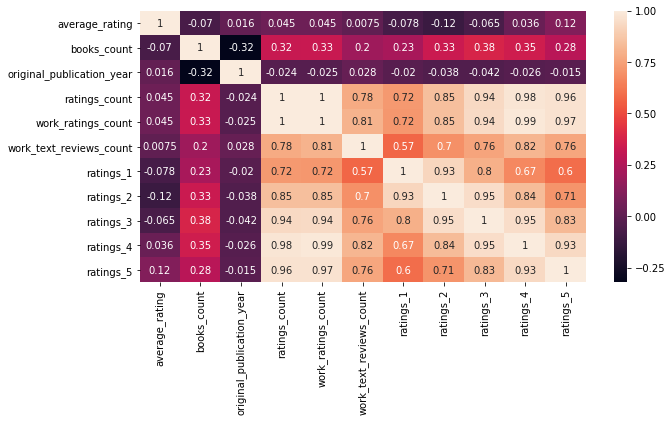

In [186]:
# Correlation matrix for numerical features:

numerical = ['average_rating', 'books_count', 'original_publication_year',
       'ratings_count', 'work_ratings_count', 'work_text_reviews_count',
       'ratings_1', 'ratings_2', 'ratings_3', 'ratings_4', 'ratings_5']

#Heatmap:
plt.figure(figsize=figsize)
corr = book[numerical].corr()
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values,annot=True)
plt.savefig("12.png")
plt.show()

In [42]:
#See which features are correlated with 'avg rating':

corr.average_rating.sort_values(ascending=False)

average_rating               1.000000
ratings_5                    0.115412
work_ratings_count           0.045042
ratings_count                0.044990
ratings_4                    0.036108
original_publication_year    0.015608
work_text_reviews_count      0.007481
ratings_3                   -0.065237
books_count                 -0.069888
ratings_1                   -0.077997
ratings_2                   -0.115875
Name: average_rating, dtype: float64

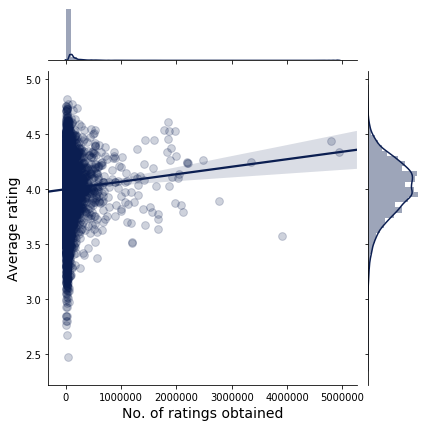

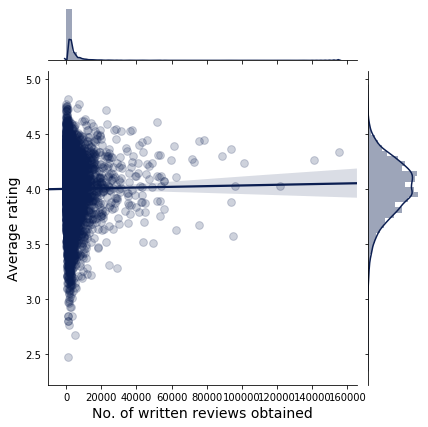

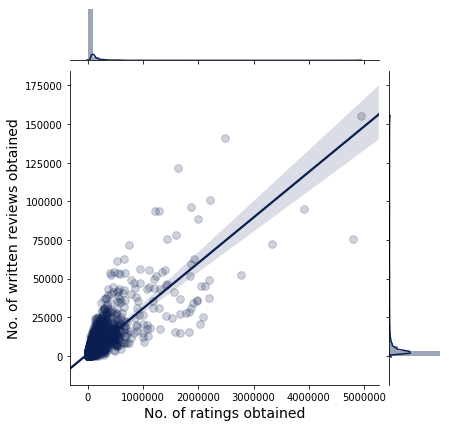

In [148]:
#To see if there is any correlation between the  Average rating and the no. of ratings and the no. of written reviews obntained:


# Correlation between 'Average rating' and 'total no. of reviews obtained':
#plt.figure(figsize=figsize)
sns.jointplot(x="work_ratings_count", y="average_rating", data=book, kind="reg", scatter_kws={'alpha':0.2, 's':60});
plt.xlabel('No. of ratings obtained', fontsize=fontsize)
plt.ylabel('Average rating', fontsize=fontsize)
#plt.title('Correlations between the Average rating and the no. of ratings obtained', fontsize=fontsize)
plt.savefig("13.png")
plt.show()

# Correlation between 'Average rating' and 'total no. of written reviews obtained':
#plt.figure(figsize=figsize)
sns.jointplot(x="work_text_reviews_count", y="average_rating", data=book, kind='reg', scatter_kws={'alpha':0.2,'s':60});
plt.xlabel('No. of written reviews obtained',fontsize=fontsize)
plt.ylabel('Average rating',fontsize=fontsize);
#plt.title('Correlations between the average ratings and the no. of written reviews obtained',fontsize=fontsize)
plt.savefig("14.png")
plt.show()

# Correlation between 'total no. of ratings obtained' and 'total no. of written reviews obtained':
#plt.figure(figsize=figsize)
sns.jointplot(x="work_ratings_count", y="work_text_reviews_count", data=book, kind='reg', scatter_kws={'alpha':0.2, 's':60});
plt.xlabel('No. of ratings obtained',fontsize=fontsize)
plt.ylabel('No. of written reviews obtained',fontsize=fontsize)
#plt.title('Correlations between the no. of ratings and the no. of written reviews obtained')
plt.savefig("15.png")
plt.show()

In [137]:
from scipy.stats.stats import pearsonr

print(pearsonr(book.work_ratings_count, book.average_rating))
print(pearsonr(book.work_text_reviews_count, book.average_rating))
print(pearsonr(book.work_ratings_count, book.work_text_reviews_count))

(0.04504158523940048, 6.609776142054146e-06)
(0.007481118668792911, 0.4544427777485881)
(0.807009018315289, 0.0)


In [44]:
# Most rated books:

book.sort_values(by='work_ratings_count', ascending=False).head(10)[[
    'title', 'authors','work_ratings_count', 'average_rating']]

,title,authors,work_ratings_count,average_rating
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,4942365,4.34
1,Harry Potter and the Sorcerer's Stone (Harry P...,"J.K. Rowling, Mary GrandPré",4800065,4.44
2,"Twilight (Twilight, #1)",Stephenie Meyer,3916824,3.57
3,To Kill a Mockingbird,Harper Lee,3340896,4.25
4,The Great Gatsby,F. Scott Fitzgerald,2773745,3.89
5,The Fault in Our Stars,John Green,2478609,4.26
11,"Divergent (Divergent, #1)",Veronica Roth,2216814,4.24
6,The Hobbit,J.R.R. Tolkien,2196809,4.25
9,Pride and Prejudice,Jane Austen,2191465,4.24
7,The Catcher in the Rye,J.D. Salinger,2120637,3.79


In [45]:
# Highest rated books:

book.sort_values(by='average_rating', ascending=False).head(10)[['title','authors', 'work_ratings_count', 'average_rating']]

,title,authors,work_ratings_count,average_rating
3627,The Complete Calvin and Hobbes,Bill Watterson,29968,4.82
3274,"Harry Potter Boxed Set, Books 1-5 (Harry Potte...","J.K. Rowling, Mary GrandPré",33424,4.77
861,"Words of Radiance (The Stormlight Archive, #2)",Brandon Sanderson,108176,4.77
8853,Mark of the Lion Trilogy,Francine Rivers,9547,4.76
7946,ESV Study Bible,"Anonymous, Lane T. Dennis, Wayne A. Grudem",10784,4.76
4482,It's a Magical World: A Calvin and Hobbes Coll...,Bill Watterson,23429,4.75
6360,There's Treasure Everywhere: A Calvin and Hobb...,Bill Watterson,17285,4.74
421,"Harry Potter Boxset (Harry Potter, #1-7)",J.K. Rowling,204125,4.74
3752,"Harry Potter Collection (Harry Potter, #1-6)",J.K. Rowling,26274,4.73
6919,The Indispensable Calvin and Hobbes,Bill Watterson,16911,4.73


In [46]:
# Most written review books:

book.sort_values(by='work_text_reviews_count', ascending=False).head(10)[[
    'title', 'authors','work_text_reviews_count', 'average_rating']]

,title,authors,work_text_reviews_count,average_rating
0,"The Hunger Games (The Hunger Games, #1)",Suzanne Collins,155254,4.34
5,The Fault in Our Stars,John Green,140739,4.26
29,Gone Girl,Gillian Flynn,121614,4.03
11,"Divergent (Divergent, #1)",Veronica Roth,101023,4.24
19,"Mockingjay (The Hunger Games, #3)",Suzanne Collins,96274,4.03
2,"Twilight (Twilight, #1)",Stephenie Meyer,95009,3.57
46,The Book Thief,Markus Zusak,93611,4.36
60,The Girl on the Train,Paula Hawkins,93600,3.88
16,"Catching Fire (The Hunger Games, #2)",Suzanne Collins,88538,4.30
30,The Help,Kathryn Stockett,78204,4.45


In [47]:
#Genre:

# Merge book_tags and tag description
book_tag = pd.merge(book_tag, tag, on='tag_id')
book_tag.head()

,goodreads_book_id,tag_id,count,tag_name
0,1,30574,167697,to-read
1,2,30574,24549,to-read
2,3,30574,496107,to-read
3,5,30574,11909,to-read
4,6,30574,298,to-read


In [241]:
# most popular tags:
# Group by tag_name and count number of books they've been used for.
tag_frequency = book_tag.groupby(['tag_name'])['goodreads_book_id'].count().sort_values(ascending=False)

tag_frequency.head()

tag_name
to-read              9983
favorites            9881
owned                9858
books-i-own          9799
currently-reading    9776
Name: goodreads_book_id, dtype: int64

In [52]:
#tag_frequency
tag_frequency.describe()

count    34252.000000
mean        29.192806
std        277.254715
min          1.000000
25%          1.000000
50%          1.000000
75%          5.000000
max       9983.000000
Name: goodreads_book_id, dtype: float64

In [63]:
#We will consider those tags, which have been used at least 1000 times:

pop_tag_freq=tag_frequency[tag_frequency > 1000]

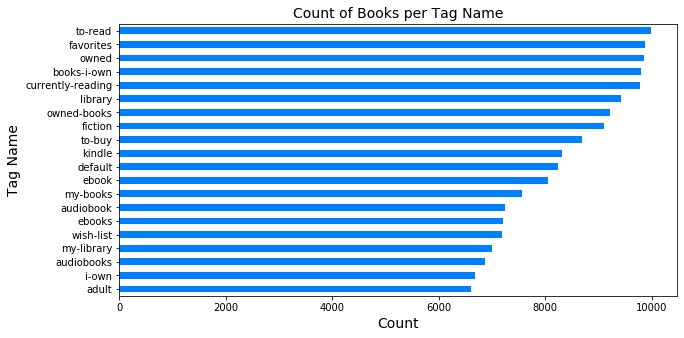

In [103]:
 plt.figure(figsize = figsize)
_ = tag_frequency[:20].sort_values().plot.barh(color=light_blue)

_ = plt.title('Count of Books per Tag Name', fontsize=fontsize)
_ = plt.xlabel('Count', fontsize=fontsize)
_ = plt.ylabel('Tag Name', fontsize=fontsize)
#_ = plt.xscale('log')
plt.savefig("17.png")
plt.show()


In [221]:
#To check Book IDs with title:
#from the previous dataset we saw that 5 books with highest variation in their ratings are as follows:
#book_id = 4154,1338,4962,3075,9486

book[book['book_id'] == 4154]
book[book['book_id'] == 1338]
book[book['book_id'] == 4962]
book[book['book_id'] == 3075]
book[book['book_id'] == 9486]

,book_id,goodreads_book_id,books_count,isbn,authors,original_publication_year,original_title,title,language_code,average_rating,ratings_count,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5
9485,9486,16084702,5,NaN,E.L. James,2012.0,NaN,Fifty Shades Duo: Fifty Shades Darker / Fifty ...,en-GB,4.41,8227,8268,80,373,307,693,1107,5788


### Books with highest variation in their ratings:

We see that the five books with highest variation in their ratings are as follows:
1. Book-ID: 4154 (**The Book of Mormon..**)
2. Book-ID: 1338 (**The Book of Mormon: Another Testament of Jesus...**)
3. Book-ID: 4962 (**The Zombie Room**)
4. Book-ID: 3075 (**Twilight: The Graphic Novel**)
5. Book-ID: 9486 (**Fifty Shades Duo: Fifty Shades Darker / Fifty ...**)

So what we see is Christianity and sexuality is the most controversial, where different people have different opinions. So, ratings are widely varied.